# Raphtory Python Client - HIGGS TWITTER DEMO

In this demo we will
* Create a Python Raphtory client
* Create a Graph from data in Raphtory
* Pull results from an algorithm in Raphtory
* Add these results to the Graph
* Visualise the graph with pymotif

### Setup Code

First we setup the various libraries we will need

In [1]:
pip install raphtory-client

You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.2.8/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
from raphtoryclient import raphtoryclient as client
from pymotif import Motif
import pandas as pd

### Create Client

Now we create a client, and then create the readers which read from topics.

If the connection fails, the code with automatically retry.

This can occur when you have not closed previous pulsar connections.

In this case we are reading the topic: Retweets

Note: Prior to this you should have already run these algorithms in Raphtory.

In [3]:
raphtory = client()

Creating RaphtoryClient object...
Created.


In [5]:
chainReader = raphtory.createReader("Retweets", subscription_name='chain_reader')

2022-05-24 14:39:42.402 INFO  [0x100a3c580] ClientConnection:190 | [<none> -> pulsar://127.0.0.1:6650] Create ClientConnection, timeout=10000
2022-05-24 14:39:42.402 INFO  [0x100a3c580] ConnectionPool:84 | Created connection for pulsar://127.0.0.1:6650
2022-05-24 14:39:42.409 INFO  [0x176eaf000] ClientConnection:376 | [127.0.0.1:55464 -> 127.0.0.1:6650] Connected to broker
2022-05-24 14:39:42.676 INFO  [0x176eaf000] HandlerBase:55 | [persistent://public/default/Retweets, reader-f48e46f869, 0] Getting connection from pool
2022-05-24 14:39:42.761 INFO  [0x176eaf000] ClientConnection:190 | [<none> -> pulsar://127.0.0.1:6650] Create ClientConnection, timeout=10000
2022-05-24 14:39:42.761 INFO  [0x176eaf000] ConnectionPool:84 | Created connection for pulsar://localhost:6650
2022-05-24 14:39:42.762 INFO  [0x176eaf000] ClientConnection:378 | [127.0.0.1:55465 -> 127.0.0.1:6650] Connected to broker through proxy. Logical broker: pulsar://localhost:6650
2022-05-24 14:39:43.033 INFO  [0x176eaf000

### Obtain dataframes

Now we will run the getDataframe function to retrieve results as dataframes.

In [7]:
df_edge = raphtory.getDataframe(chainReader)

Obtaining dataframe...

Converting to columns...
Completed.


In [8]:
pandaDataframe = df_edge.rename({'result_0': 'pulsar_timestamp', 'result_1': 'source_id', 'result_2': 'destination_id', 'result_3':'time'}, axis=1)
pandaDataframe

,pulsar_timestamp,source_id,destination_id,time
0,1341101181,50329,376989,1341101181
1,1341705593,4,122752,1341390531
2,1341705593,4,123776,1341378125
3,1341705593,4,117251,1341379205
4,1341705593,4,117251,1341380406
...,...,...,...,...
10996,1341705593,222950,227060,1341328361
10997,1341705593,91882,114963,1341385627
10998,1341705593,91882,268102,1341395049
10999,1341705593,91882,46660,1341386280


In [9]:
#filter to just see vertex 4, a potential bot
df2 = pandaDataframe.loc[pandaDataframe["source_id"]=="4"]

In [10]:
#convert unix time to dd/mm/yyyy format
df2["time"] = pd.to_datetime(df2["time"], unit="s")
df2

/var/folders/hj/z9sx_2nd6jqbf7nblbgw7vq80000gn/T/ipykernel_13916/551898380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["time"] = pd.to_datetime(df2["time"], unit="s")


,pulsar_timestamp,source_id,destination_id,time
1,1341705593,4,122752,2012-07-04 08:28:51
2,1341705593,4,123776,2012-07-04 05:02:05
3,1341705593,4,117251,2012-07-04 05:20:05
4,1341705593,4,117251,2012-07-04 05:40:06
5,1341705593,4,117251,2012-07-04 06:20:06
...,...,...,...,...
277,1341705593,4,424319,2012-07-04 06:03:03
278,1341705593,4,90875,2012-07-04 05:03:40
279,1341705593,4,116859,2012-07-04 05:07:07
280,1341705593,4,180606,2012-07-04 05:30:04


### Visualisation

Finally we plot the graph with an open source visualisation tool .

<AxesSubplot:title={'center':'Retweets'}, xlabel='time', ylabel='time'>

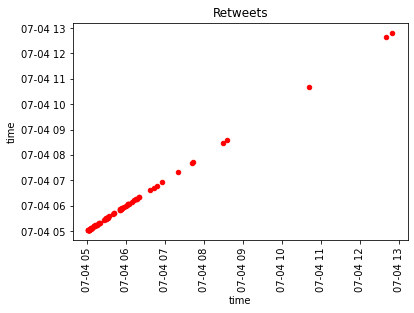

In [11]:
#scatter plot over time for vertex 4
df2.plot.scatter(x='time',y='time',title='Retweets', rot=90, c='red')

In [12]:
#refine scatter graph to only show certain timeframe
df3 = df2[(df2['time']>"2012-07-04 05:20:00") & (df2['time']<"2012-07-04 06:20:00")]  
df3

,pulsar_timestamp,source_id,destination_id,time
3,1341705593,4,117251,2012-07-04 05:20:05
4,1341705593,4,117251,2012-07-04 05:40:06
7,1341705593,4,2564,2012-07-04 05:54:02
9,1341705593,4,52232,2012-07-04 05:50:21
10,1341705593,4,1162,2012-07-04 06:13:05
17,1341705593,4,39065,2012-07-04 05:52:55
20,1341705593,4,55836,2012-07-04 06:16:36
21,1341705593,4,18205,2012-07-04 05:52:27
23,1341705593,4,9631,2012-07-04 05:26:56
25,1341705593,4,21541,2012-07-04 05:28:59


<AxesSubplot:title={'center':'Retweets'}, xlabel='time', ylabel='time'>

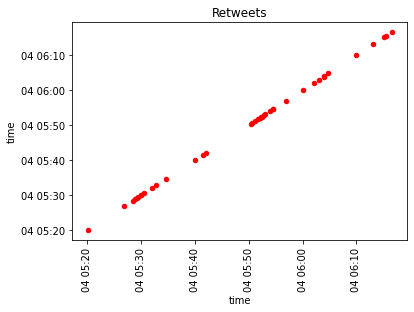

In [13]:
#scatter plot for filtered time (keep filtering to get your desired results)
df3.plot.scatter(x='time',y='time',title='Retweets', rot=90, c='red')